Root: 3.296875
         a       b       Mid    f(Mid)
0  3.00000  4.0000  3.500000 -0.019757
1  3.00000  3.5000  3.250000  0.005849
2  3.25000  3.5000  3.375000 -0.008681
3  3.25000  3.3750  3.312500 -0.001877
4  3.25000  3.3125  3.281250  0.001867
5  3.28125  3.3125  3.296875 -0.000034


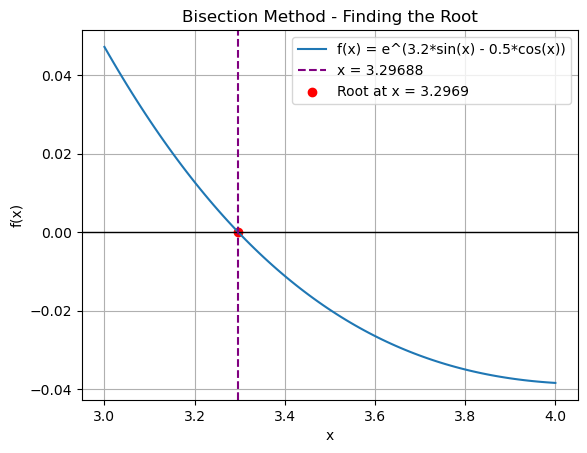

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x) * (3.2 * np.sin(x) - 0.5 * np.cos(x))

def bisection_method(f, a, b, tol=1e-5, max_iter=1000):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs.")
    
    iterations = []
    
    for _ in range(max_iter):
        mid = (a + b) / 2
        iterations.append([a, b, mid, f(mid)])
        
        if abs(f(mid)) < tol:
            return mid, iterations
        
        if f(a) * f(mid) < 0:
            b = mid
        else:
            a = mid
    
    return (a + b) / 2, iterations


a, b = 3, 4
tol = 0.001


root, iterations = bisection_method(f, a, b, tol)


print(f"Root: {root}")

# Display the iterations in tabular format

df = pd.DataFrame(iterations, columns=["a", "b", "Mid", "f(Mid)"])
print(df)

x_vals = np.linspace(3, 4, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label="f(x) = e^(3.2*sin(x) - 0.5*cos(x))")
plt.axhline(0, color='black',linewidth=1)
plt.axvline(root,color='Purple',linestyle='--',label=f'x = {root:.5f}')
plt.scatter(root, f(root), color='red', label=f"Root at x = {root:.4f}")
plt.title("Bisection Method - Finding the Root")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()